In [1]:
# Upload your google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Acces to the folder 
FolderName = 'Colab Notebooks'
path_config_file = '/content/drive/My Drive/'+FolderName+'/AUDITION_2000ms/'
path_config_file

'/content/drive/My Drive/Colab Notebooks/AUDITION_2000ms/'

In [3]:
# The libraries needed
import os
import scipy.io as sio
from os.path import dirname, join as pjoin
import numpy as np

# list all the files that are part of the dataset
all_mats = [i for i in os.listdir(path_config_file) if 'mat' in i]

# load the time-series data in each of the data files
# and store them in a numpy array
data_s = []
data_r = []
for mat in all_mats:
  matstruct_fname = pjoin(path_config_file, mat)
  s = sio.loadmat(matstruct_fname)['Sr'] #,mdict=None, appendmat=True,mat_dtype=True
  r = sio.loadmat(matstruct_fname)['Rr']
  data_s.append(s)
  data_r.append(r)
data_s = np.concatenate(data_s,axis=0)
data_r = np.concatenate(data_r,axis=0)

# data contains 2595 points, remember that each iteration has 519 points

In [5]:
DUR = 2000
BEATS = 3
REP = 5
PTS = BEATS*REP+1
TRY_DUR = DUR*(REP+1)
nb_pts = 519
IT = [1,2,3,4]
pts4it = [num*nb_pts for num in IT]

# Stimuli
one_pt_IT1 = np.array([n for n in data_s[0]])
one_pt_IT2 = np.array([n for n in data_s[pts4it[0]]])
one_pt_IT3 = np.array([n for n in data_s[pts4it[1]]])
one_pt_IT4 = np.array([n for n in data_s[pts4it[2]]])
one_pt_IT5 = np.array([n for n in data_s[pts4it[3]]])

# one_pt_IT2 = data[pts4it[0]]
# one_pt_IT3 = data[pts4it[1]]
# one_pt_IT4 = data[pts4it[2]]
# one_pt_IT5 = data[pts4it[3]]

# reshape to get only 1-D
nreps,nvow,nsamps=one_pt_IT1.shape
data_s1 = np.reshape(one_pt_IT1,(nreps*nvow,nsamps),order='F') 

# Response
r_IT1 = np.array([n for n in data_r[0]])
r_IT2 = np.array([n for n in data_r[pts4it[0]]])
r_IT3 = np.array([n for n in data_r[pts4it[1]]])
r_IT4 = np.array([n for n in data_r[pts4it[2]]])
r_IT5 = np.array([n for n in data_r[pts4it[3]]])

# reshape to get only 1-D
nreps,nvow,nsamps=r_IT1.shape
data_r1 = np.reshape(r_IT1,(nreps*nvow,nsamps),order='F') 


Text(0.5, 0, 'Time (in sec)')

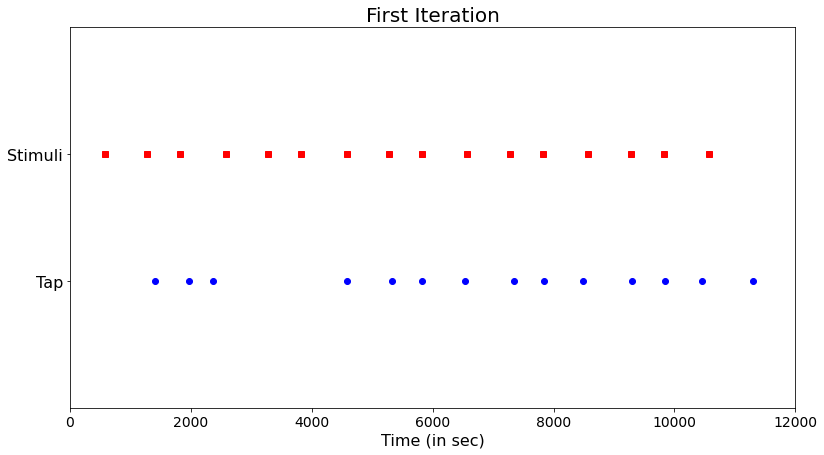

In [6]:
import matplotlib.pyplot as plt

#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 2.7))
y_stm = np.ones((1,PTS), dtype=int)*2
y_tap = np.ones((1,r_IT1.shape[1]), dtype=int)
plt.figure(figsize=(13,7))
plt.plot(data_s1,y_stm,'s',color='red',label='Simuli')
plt.plot(data_r1,y_tap,'o',color='blue',label='Tap')
plt.axis([0,TRY_DUR,0,3])
plt.xticks(fontsize=14)
plt.yticks([1,2],['Tap','Stimuli'],fontsize=16)
plt.title('First Iteration',fontsize=20)
plt.xlabel('Time (in sec)',fontsize=16)

In [7]:
from tabulate import tabulate
mylabels = np.array([111,112,113,121,122,123,131,132,
          211,212,213,221,223,231,232,233,
          311,312,321,322,323,332])

mydata = [["111"],["112"],["113"],["121"],["122"],["123"],["131"],["132"],
          ["211"],["212"],["213"],["221"],["223"], ["231"],["232"],["233"],
          ["311"],["312"],["321"],["322"],["323"],["332"]
]
# create header
head = ["Integer Ratio Rhythms"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+-------------------------+
|   Integer Ratio Rhythms |
+=========================+
|                     111 |
+-------------------------+
|                     112 |
+-------------------------+
|                     113 |
+-------------------------+
|                     121 |
+-------------------------+
|                     122 |
+-------------------------+
|                     123 |
+-------------------------+
|                     131 |
+-------------------------+
|                     132 |
+-------------------------+
|                     211 |
+-------------------------+
|                     212 |
+-------------------------+
|                     213 |
+-------------------------+
|                     221 |
+-------------------------+
|                     223 |
+-------------------------+
|                     231 |
+-------------------------+
|                     232 |
+-------------------------+
|                     233 |
+-------------------------+
|                   